In [1]:
#Six routes: {as-is, binarized} inputs into {normal, denoising, contractive} autoencoder
#Can binarize inputs by making a pitch 1 if it's top four in the chroma and > 0.2, and make all other pitches
#in the chroma 0 (for example)

In [2]:
%matplotlib inline
import numpy as np
import math

from chromaviz import display_chroma

# Load and parse data

In [3]:
lines = []
with open('samplechromasmini', 'r') as f:
    for line in f:
        lines.append(line)

In [4]:
def parse(line):
    vals = line.split(',')
    artist = vals[0]
    title = vals[1]
    track_id = vals[2]
    
    chroma_feats = np.array([float(x) for x in vals[5:]])
        
    return (artist + ', ' + title, chroma_feats)

in_data = [parse(line) for line in lines]
print len(in_data), len(in_data[0][1])

9484 600


# Basic Autoencoder, Nonbinarized Input

In [5]:
from Autoencoder import Autoencoder
import time

In [6]:
chroma_data = [pair[1] for pair in in_data]

In [26]:
start = time.time()
ae_chroma = Autoencoder(chroma_data[:1000], 100)
ae_chroma.train(num_epochs=800, verbose=True, blr=0.3, delta=1e-2)
print 'Took ' + str(time.time() - start) + ' seconds'
ae_chroma.save_params()

0 382.627548726
80 335.640380278
160 331.642812552
240 328.022133686
320 325.425205441
400 323.519611837
480 321.104566422
560 319.903956182
640 318.44846858
720 317.666679132
800 316.609390153
Took 1307.46802807 seconds


In [27]:
input_sample = ae_chroma._indata[1][:48]
recon_sample = ae_chroma.decode_hidden(ae_chroma.encode_input(ae_chroma._indata[1]))[:48]
print [math.trunc(abs(i)*1000)/1000.0 for i in input_sample]
print '\n'
print [math.trunc(abs(r)*1000)/1000.0 for r in recon_sample]
print '\n'
print [math.trunc(abs(diff)*1000)/1000.0 for diff in recon_sample-input_sample]

[1.0, 0.885, 0.534, 0.465, 0.539, 0.861, 0.761, 0.407, 0.246, 0.225, 0.238, 0.546, 1.0, 0.321, 0.135, 0.065, 0.028, 0.096, 0.098, 0.055, 0.087, 0.096, 0.083, 0.886, 1.0, 0.292, 0.137, 0.016, 0.018, 0.026, 0.114, 0.022, 0.257, 0.399, 0.714, 0.417, 1.0, 0.592, 0.183, 0.027, 0.023, 0.031, 0.243, 0.163, 0.517, 0.751, 0.891, 0.317]


[0.949, 0.859, 0.506, 0.535, 0.41, 0.541, 0.598, 0.351, 0.363, 0.653, 0.754, 0.742, 0.845, 0.172, 0.182, 0.147, 0.082, 0.049, 0.101, 0.092, 0.273, 0.453, 0.351, 0.696, 0.818, 0.355, 0.219, 0.253, 0.228, 0.107, 0.105, 0.023, 0.308, 0.565, 0.575, 0.765, 0.872, 0.511, 0.197, 0.204, 0.253, 0.199, 0.234, 0.102, 0.23, 0.749, 0.748, 0.824]


[0.05, 0.025, 0.027, 0.07, 0.128, 0.319, 0.162, 0.055, 0.117, 0.428, 0.516, 0.196, 0.154, 0.148, 0.047, 0.082, 0.054, 0.046, 0.003, 0.037, 0.186, 0.357, 0.268, 0.189, 0.181, 0.063, 0.082, 0.237, 0.21, 0.081, 0.008, 0.001, 0.051, 0.166, 0.138, 0.348, 0.127, 0.08, 0.014, 0.177, 0.23, 0.168, 0.008, 0.06, 0.286, 0.001, 0.142, 0.507]


In [28]:
for datum in in_data:
    if('fig leaf' in datum[0].lower()):
        figleaf = datum

Joshua Rifkin, Fig Leaf Rag  (LP Version)


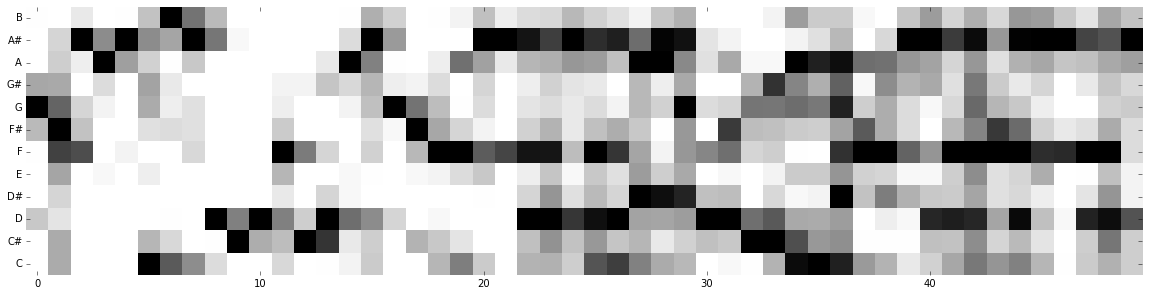

In [32]:
print figleaf[0]
display_chroma(divide_pitches(figleaf[1]), length=100)

Reconstruction


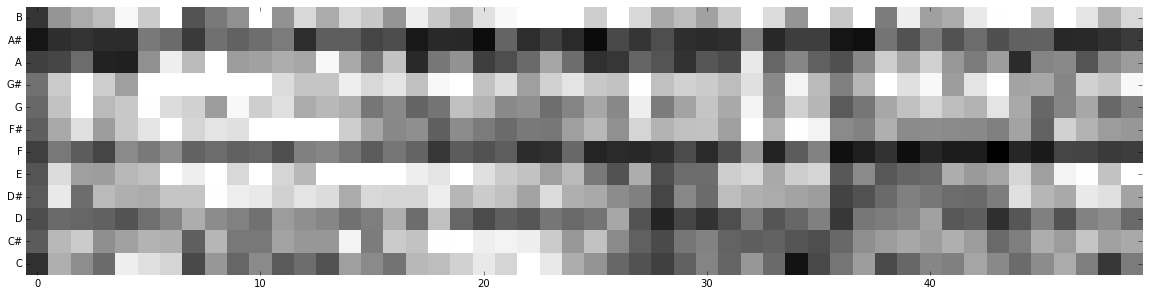

In [33]:
print 'Reconstruction'
display_chroma(divide_pitches(ae_chroma.decode_hidden(ae_chroma.encode_input(figleaf[1]))), length=100)

In [7]:
def divide_pitches(pitches):
    divided_pitches = []
    for i in range(len(pitches)/12):
        divided_pitches.append(pitches[i*12 : (i+1)*12])
    return divided_pitches

# Denoising autoencoder, Nonbinarized input

In [8]:
#Is this typically done with overcomplete hidden layer?

In [9]:
from DenoisingAutoencoder import DenoisingAutoencoder

In [14]:
print dae_chroma._indata[0][:48]
print dae_chroma.noisify(dae_chroma._indata[0])12[:48]

[ 0.814  1.     0.5    0.435  0.436  0.418  0.343  0.323  0.377  0.278
  0.326  0.16   1.     0.416  0.168  0.181  0.2    0.205  0.352  0.307
  0.121  0.094  0.474  0.066  1.     0.765  0.73   0.727  0.418  0.418
  0.531  0.531  0.514  0.517  0.735  0.723  1.     0.725  0.565  0.58
  0.496  0.476  0.563  0.558  0.652  0.647  0.495  0.069]
[ 0.814  1.     0.5    0.435  0.436  0.418  0.     0.323  0.377  0.     0.326
  0.     1.     0.     0.     0.181  0.2    0.205  0.352  0.     0.121
  0.094  0.474  0.066  1.     0.765  0.     0.727  0.     0.418  0.531  0.
  0.514  0.517  0.735  0.     1.     0.     0.565  0.     0.496  0.     0.
  0.558  0.652  0.     0.     0.069]


In [19]:
start = time.time()
dae_chroma = DenoisingAutoencoder(chroma_data[:1000], 100, noise_level=0.4)
dae_chroma.train(num_epochs=800, verbose=True, blr=0.3, delta=8e-3)
print 'Took ' + str(time.time() - start) + ' seconds'
dae_chroma.save_params()

0 383.22511852
80 385.926530384
160 381.920734006
240 378.40488576
320 376.438210971
400 360.163605773
480 363.499022631
560 357.401807804
640 357.160072302
720 356.628463376
800 356.40512375
Took 1529.3599472 seconds


TypeError: save_params() takes no arguments (1 given)

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


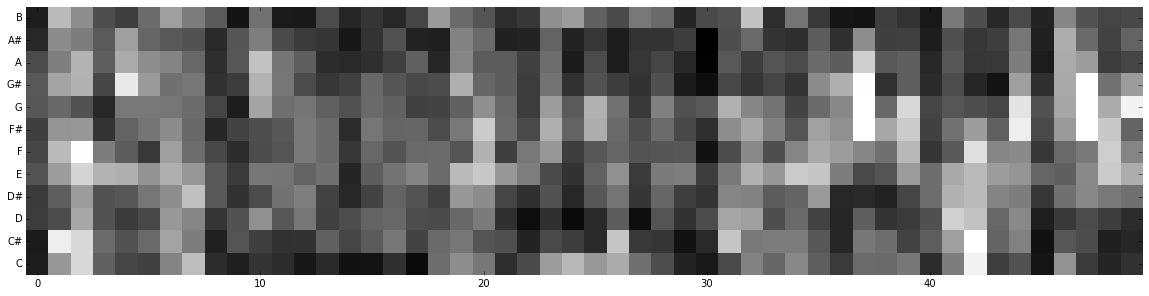

In [38]:
hidden_vec = np.zeros(100)
hidden_vec[0] = 1
print hidden_vec
display_chroma(divide_pitches(ae_chroma.decode_hidden(hidden_vec)), length=100)

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


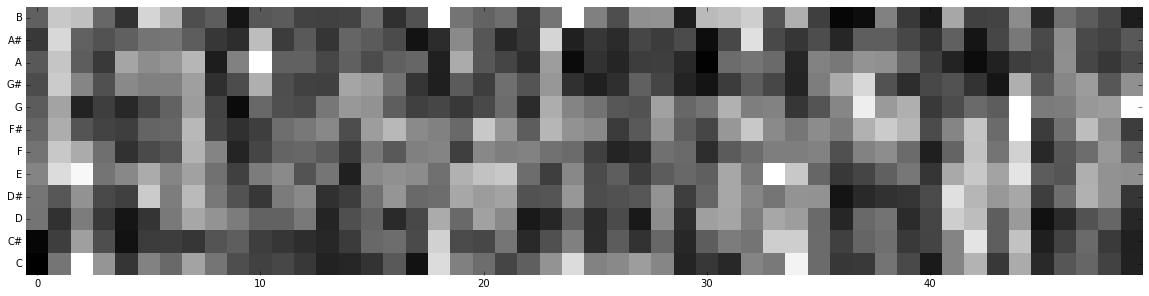

In [39]:
hidden_vec = np.zeros(100)
hidden_vec[1] = 1
print hidden_vec
display_chroma(divide_pitches(ae_chroma.decode_hidden(hidden_vec)), length=100)

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


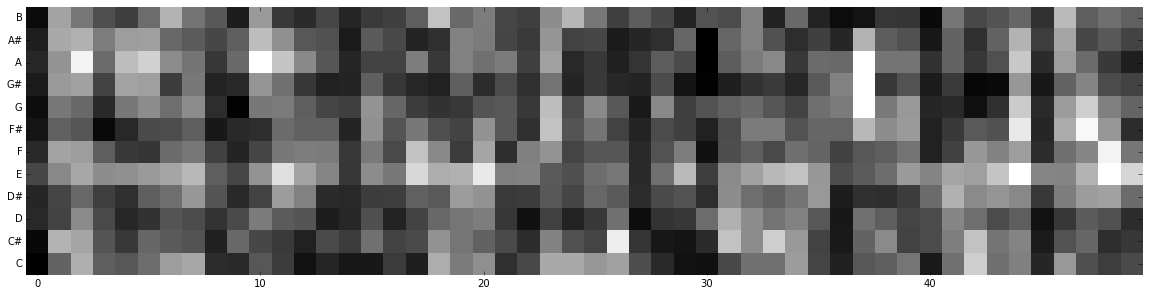

In [40]:
hidden_vec = np.zeros(100)
hidden_vec[2] = 1
print hidden_vec
display_chroma(divide_pitches(ae_chroma.decode_hidden(hidden_vec)), length=100)

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


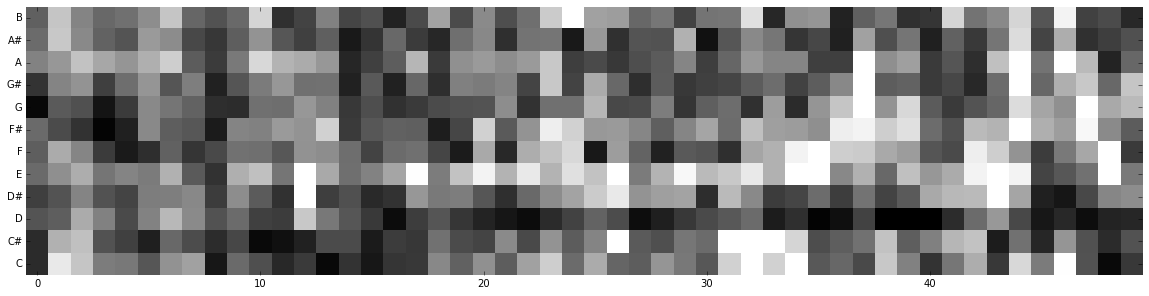

In [41]:
hidden_vec = np.zeros(100)
hidden_vec[3] = 1
print hidden_vec
display_chroma(divide_pitches(ae_chroma.decode_hidden(hidden_vec)), length=100)

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


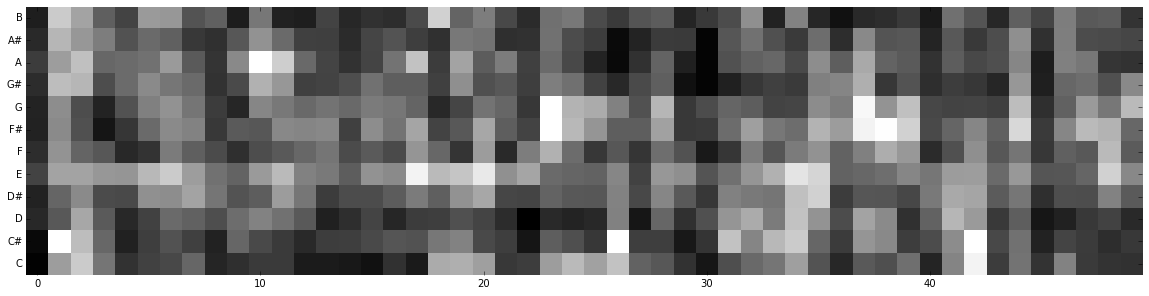

In [42]:
hidden_vec = np.zeros(100)
hidden_vec[4] = 1
print hidden_vec
display_chroma(divide_pitches(ae_chroma.decode_hidden(hidden_vec)), length=100)

# Denoising autoencoder, binarized input

In [10]:
def binarize(invec):
    div = divide_pitches(invec)
    binarized = []
    for twelve in div:
        bintwelve = []
        sorted_args = np.argsort(twelve)[::-1]
        for i in range(12):
            if(twelve[i] > 0.35 and i in sorted_args[:4]):
                binarized.append(1)
            else:
                binarized.append(0)
    return binarized

In [11]:
print chroma_data[0][:96]
print binarize(chroma_data[0])[:96]

[ 0.814  1.     0.5    0.435  0.436  0.418  0.343  0.323  0.377  0.278
  0.326  0.16   1.     0.416  0.168  0.181  0.2    0.205  0.352  0.307
  0.121  0.094  0.474  0.066  1.     0.765  0.73   0.727  0.418  0.418
  0.531  0.531  0.514  0.517  0.735  0.723  1.     0.725  0.565  0.58
  0.496  0.476  0.563  0.558  0.652  0.647  0.495  0.069  1.     0.497
  0.378  0.407  0.517  0.493  0.699  0.712  0.613  0.62   0.302  0.051  1.
  0.692  0.25   0.166  0.186  0.103  0.115  0.092  0.079  0.056  0.087
  0.389  1.     0.43   0.054  0.109  0.163  0.125  0.075  0.061  0.053
  0.032  0.031  0.203  1.     0.801  0.118  0.144  0.143  0.095  0.071
  0.172  0.111  0.045  0.051  0.131]
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
#Final loss was 190.958
start = time.time()
binarized = [binarize(chromavec) for chromavec in chroma_data[:1000]]
daeb_chroma = DenoisingAutoencoder(binarized, 200, noise_level=0.35)
daeb_chroma.train(num_epochs=3000, verbose=True, blr=0.3, delta=8e-3)
print 'Took ' + str(time.time() - start) + ' seconds'
daeb_chroma.save_params()

0 322.854545444
300 195.502272781
600 154.037401409
900 132.556718419
1200 125.67301952
1500 118.680471585
1800 113.516653025
2100 110.728249716
2400 109.206787607
2700 106.431909482
3000 105.917710289
Took 9378.70078111 seconds


In [14]:
input_sample = daeb_chroma._indata[1][:48]
recon_sample = daeb_chroma.decode_hidden(daeb_chroma.encode_input(daeb_chroma._indata[1]))[:48]
print [math.trunc(abs(i)*1000)/1000.0 for i in input_sample]
print '\n'
print [math.trunc(abs(r)*1000)/1000.0 for r in recon_sample]
print '\n'
print [math.trunc(abs(diff)*1000)/1000.0 for diff in recon_sample-input_sample]

[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]


[0.937, 0.913, 0.003, 0.002, 0.0, 0.402, 0.961, 0.265, 0.025, 0.0, 0.068, 0.026, 0.953, 0.03, 0.0, 0.0, 0.357, 0.004, 0.058, 0.006, 0.009, 0.722, 0.223, 0.994, 0.745, 0.055, 0.005, 0.001, 0.021, 0.002, 0.002, 0.002, 0.012, 0.983, 0.725, 0.994, 0.867, 0.881, 0.011, 0.0, 0.141, 0.013, 0.002, 0.0, 0.004, 0.958, 0.997, 0.831]


[0.062, 0.086, 0.003, 0.002, 0.0, 0.597, 0.038, 0.265, 0.025, 0.0, 0.068, 0.026, 0.046, 0.03, 0.0, 0.0, 0.357, 0.004, 0.058, 0.006, 0.009, 0.722, 0.223, 0.005, 0.254, 0.055, 0.005, 0.001, 0.021, 0.002, 0.002, 0.002, 0.012, 0.016, 0.274, 0.005, 0.132, 0.118, 0.011, 0.0, 0.141, 0.013, 0.002, 0.0, 0.004, 0.041, 0.002, 0.831]


In [15]:
#Check binarize is as intended:
print daeb_chroma._indata[0]

[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 

In [16]:
for datum in in_data:
    if('hammerklavier' in datum[0].lower()):
        hklavier = datum

Solomon, Piano Sonata No. 29 in B flat major Op. 106  "Hammerklavier" (2005 Digital Remaster): II.     Scherzo (Assai vivace) - Presto


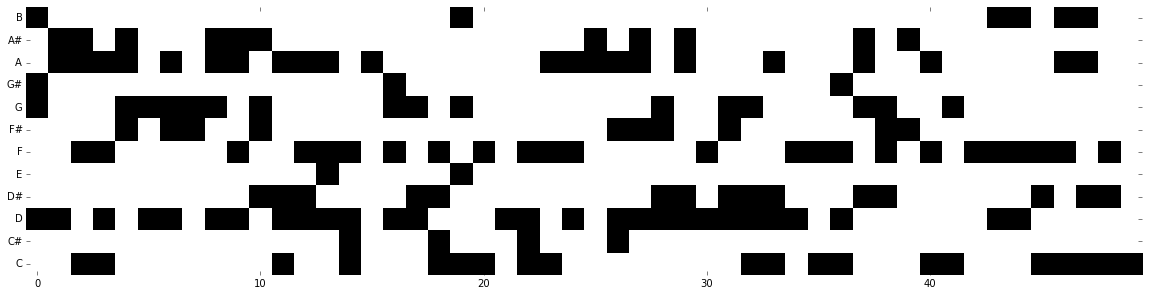

In [17]:
print hklavier[0]
display_chroma(divide_pitches(binarize(hklavier[1])), length=100)

Reconstruction


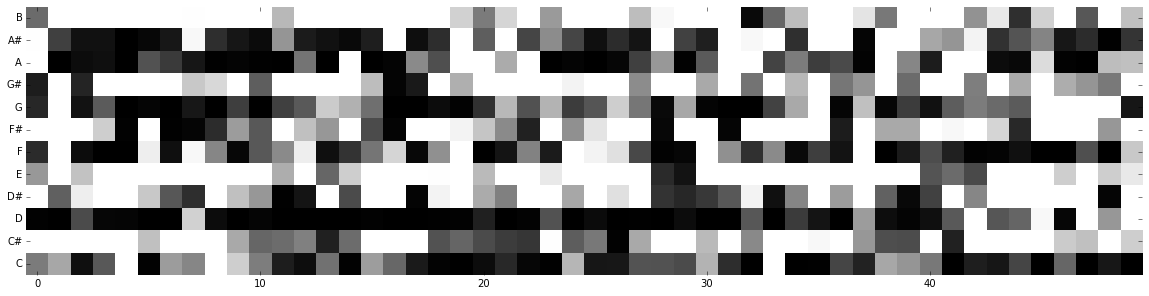

In [18]:
print 'Reconstruction'
display_chroma(divide_pitches(
        daeb_chroma.decode_hidden(daeb_chroma.encode_input(binarize(hklavier[1])))), length=100)

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


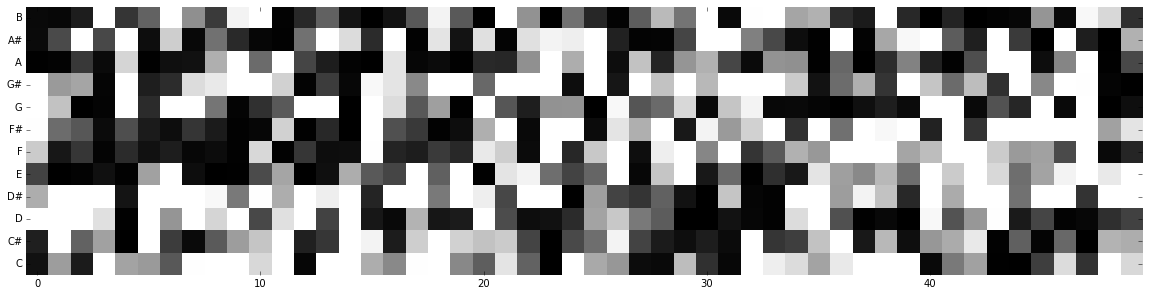

In [20]:
hidden_vec = np.zeros(200)
hidden_vec[0] = 1
print hidden_vec
display_chroma(divide_pitches(daeb_chroma.decode_hidden(hidden_vec)), length=100)

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


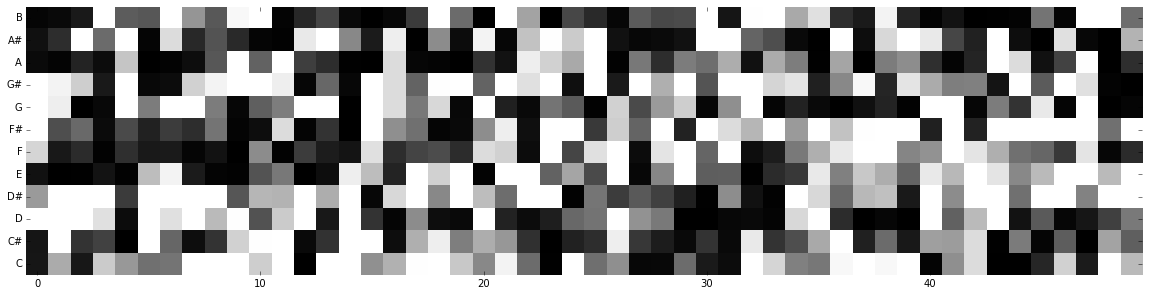

In [24]:
hidden_vec = np.zeros(200)
hidden_vec[1] = 1
print hidden_vec
display_chroma(divide_pitches(daeb_chroma.decode_hidden(hidden_vec)), length=100)

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


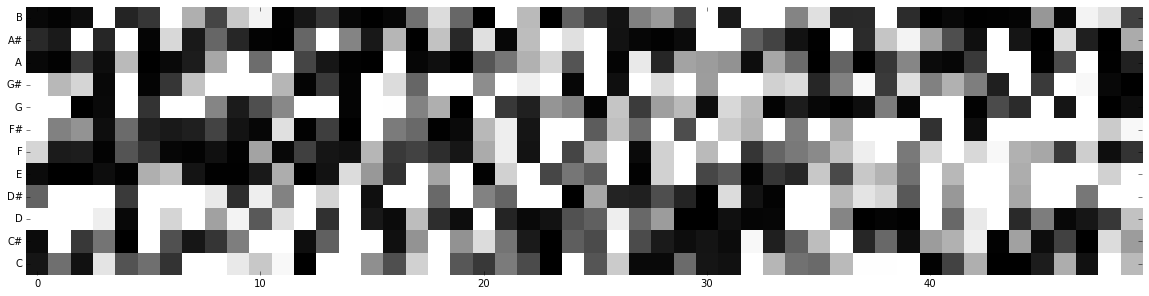

In [22]:
hidden_vec = np.zeros(200)
hidden_vec[2] = 1
print hidden_vec
display_chroma(divide_pitches(daeb_chroma.decode_hidden(hidden_vec)), length=100)